# Ames Housing Data and Kaggle Challenge
***

## Background
NexRes is a real estate agency in Ames with a portal that is highly trusted for its comprehensive market information on residential property in Iowa. NexRes helms over 40 real estate agents who assist people to buy and sell their homes. There is stiff competition in the Iowa real estate market, with more than 50 agencies vying for a slice of the pie. 

## Problem statement

I am leading the Data team at Nex Res, whose vision is to maintain its top status in the growing industry. NexRes needs the team to develop a data-driven solution to achieve their vision. Additionally, NexRes is a excellence-oriented and people-centred organisation, motivated to empower our agents to carry out their job.  To that end, the Data team has undertaken this project to predict the final price of each home with the lowest RMSE score possible via unique feature engineering and linear regression models such as Simple Linear, Ridge and Lasso.

The best model will help NexRes agents to advise clients on seeking fair valuations on their property, and as well as advise clients on actionable steps to take to reach their target price. NexRes agents are concerned with assisting homeowners who fall under two categories: those who are looking to sell, and those who are looking to buy. Agents want to provide top value to clients, who in turn want these questions answered:

* To what extent will renovations and/or remodeling give a good ROI (return of investment)? 
* Given a set list of desired features, what price range can they expect?
* Given a limited budget, which properties offer the most desired features?

## Preliminary examination of data

### Import libraries

In [1]:
# import necessary libraries for EDA and data cleaning
import pandas as pd
import numpy as np

from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set style for plots
plt.style.use('fivethirtyeight')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (11, 11)
plt.rcParams['font.size'] = 14

In [2]:
# Change display settings for pandas
pd.set_option("display.max_rows", 90)
pd.set_option("display.max_columns", 90)

### Import Data

In [3]:
# read in the data using pandas
train = pd.read_csv('./data/train.csv')

# remove space in column titles
train.columns = train.columns.str.replace(' ', '')

# convert column titles to all lowercase
train.columns = [x.lower() for x in train.columns]

### First look at data
A preliminary examination of the data shows that it has 2051 rows by 81 columns. Of the 81 columns, two are for identification purposes and the rest are features related to the observations. Running the info() method tells us that the dataset contains three datatypes, of which there are 11 tagged as a float, 28 tagged as an integer and 42 tagged as a (string) object. Before performing any data cleaning, I examine the dataset for null values/missing data and ensure that each column/feature is stored as the appropriate datatype.

In [4]:
# show 'shape' of data
train.shape

(2051, 81)

In [5]:
# show first 5 rows of data
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# describe dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
mssubclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lotfrontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lotarea,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overallqual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overallcond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
yearbuilt,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
yearremod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
masvnrarea,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [7]:
# summarise dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2051 non-null   int64  
 1   pid            2051 non-null   int64  
 2   mssubclass     2051 non-null   int64  
 3   mszoning       2051 non-null   object 
 4   lotfrontage    1721 non-null   float64
 5   lotarea        2051 non-null   int64  
 6   street         2051 non-null   object 
 7   alley          140 non-null    object 
 8   lotshape       2051 non-null   object 
 9   landcontour    2051 non-null   object 
 10  utilities      2051 non-null   object 
 11  lotconfig      2051 non-null   object 
 12  landslope      2051 non-null   object 
 13  neighborhood   2051 non-null   object 
 14  condition1     2051 non-null   object 
 15  condition2     2051 non-null   object 
 16  bldgtype       2051 non-null   object 
 17  housestyle     2051 non-null   object 
 18  overallq

### Initial cleaning

**Remove outliers mentioned in dataset notes** <br>
The special notes section of the original dataset submitted by Dean De Cock advises those perusing it to remove some outliers by setting a filter for "any houses with more than 4000 square feet from the data set" which will thus preclude these observations.

In [8]:
# drop rows where 'grlivarea' > 4000 to eliminate obvious outliers
# as advised in the notes of the original data dictionary
train.drop(index=train.loc[train.loc[:,'grlivarea'] > 4000].index, inplace= True)

In [9]:
# view dataset shape to track the changes
train.shape

# number of rows has dropped from 2051 to 2049

(2049, 81)

**Remove features wholly irrelevant to SalePrice** <br>
While the 'id' (Observation number) and 'pid' (Parcel identification number) are useful as references in looking up the observations on the city website, these are wholly irrelevant to the valuation of the property and its final sale price. Thus, I will remove them.

In [10]:
train.drop(columns=['id', 'pid'], inplace=True)

**Reformat mssubclass column** <br>
The mssubclass data have been wrongly classified as an integer, but it is a categorical variable, with a nominal nature. Each number in the mssubclass column identifies the type of dwelling involved in the sale.	I pass the apply() method with a lambda function to convert it to a string type object.

In [11]:
train['mssubclass']= train['mssubclass'].apply(lambda x: 'sub' + str(x).rjust(3, '0'))
train.head(3)

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,sub060,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,sub060,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,sub020,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


### Taking stock of data
From the original data dictionary, the dataset provides us with 78 features of the listings excluding the sale price as well as the id and pid. These features can be split into two main types: Numerical data and Categorical data. There are two sub-groups for each type.  

Numerical
* Discrete
* Continuous

Categorical
* Nominal
* Ordinal

Features that show little influence on sale price will continue to be removed. These lists allows us organise our workflow further, and for us to properly handle the data during the Exploratory Data Analysis as well as in imputing values and transforming select features during the preprocessing phase.

### Null values 
Passing the info() method earlier on the dataset revealed that there are several columns with less than 2051 observations, which means that there is a number of missing data. Let's take a closer look at which columns have missing data and calculate the percentage of missing data for these features.

In [12]:
# check for null values in dataset
null_values = pd.DataFrame(train.isnull().sum(), columns=['count_null_values'])

# add another column to calculate % of null values in each column of train dataset
null_values['pctg_null_values'] = (null_values['count_null_values'] / 2049) * 100

# sort columns according to null values in descending order
null_values.sort_values(by='count_null_values', ascending = False)

,count_null_values,pctg_null_values
poolqc,2041,99.609566
miscfeature,1985,96.876525
alley,1909,93.167399
fence,1649,80.478282
fireplacequ,1000,48.804295
lotfrontage,330,16.105417
garagefinish,114,5.563690
garagequal,114,5.563690
garageyrblt,114,5.563690
garagecond,114,5.563690


**Excessive null values**<br>
There are 26 columns with sparsely populated data. For example, 'poolqc' has over 98.4% of missing observations. The columns 'poolqc' will be dropped along with 'miscfeature' and 'alley' as these contain data for less than 10% of the total observations.

In [13]:
# drop columns with over 90% null values
train.drop(labels=['poolqc','miscfeature','alley'],axis=1, inplace=True)

# view dataset shape
# number of rows dropped from 81 to 78
train.shape

(2049, 76)

**Fireplacequ null values** <br>
The next column with highest number of null values observed is 'fireplacequ'. Exploratory analyses on columns with fireplace-related data show that observations with zero fireplaces also have null values in 'fireplacequ'. The data is missing not at random. Null values in 'fireplacequ' will be replaced with a '0' rating as we convert the ordinal data in the column to numerical type.

In [14]:
# show fireplace-related data
train_fireplace = train[['fireplacequ','fireplaces']]
grpby_fireplace = train_fireplace.groupby(['fireplacequ'])
grpby_fireplace.sum()

,fireplaces
fireplacequ,
Ex,33
Fa,70
Gd,596
Po,31
TA,477


In [15]:
# null values in fireplacequ correlate with zero fireplaces observed
display(train[train.fireplaces & train.fireplacequ.isnull()])

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,fence,miscval,mosold,yrsold,saletype,saleprice


In [16]:
# Let's impute missing values in the fireplacequ column with fillna for the time being
train.fireplacequ.fillna(value='NA', inplace=True)

# check for null values in fireplacequ column
train.fireplacequ.isnull().sum()

0

**Lot-related null values** <br>
Lot frontage refers to the width of a lot, measured at the front part of the lot. In other words, it measures the boundary between the property and the road onto which the property faces [(Source)](https://en.wikipedia.org/wiki/Frontage). As such, lot frontage is highly related to lot shape and lot configuration.

In [17]:
# show lot-related data
train_lots = train[['lotfrontage', 'lotarea', 'lotshape', 'lotconfig']]
display(train_lots.head())

,lotfrontage,lotarea,lotshape,lotconfig
0,NaN,13517,IR1,CulDSac
1,43.0,11492,IR1,CulDSac
2,68.0,7922,Reg,Inside
3,73.0,9802,Reg,Inside
4,82.0,14235,IR1,Inside


In [18]:
# do groupby based on 'lotshape'
# take mean as lotfrontage and lotarea are continuous datatype
grpby_lotshape = train_lots.groupby(['lotshape'])
grpby_lotshape.mean()

,lotfrontage,lotarea
lotshape,,
IR1,74.467949,11430.450072
IR2,59.416667,19995.454545
IR3,76.200000,15754.125000
Reg,66.968595,8815.707336


In [19]:
# do groupby based on 'lotconfig'
# use .count to see how lotfrontage observations compare with other lot-related data
grpby_lotconfig = train_lots.groupby(['lotconfig'])
grpby_lotconfig.count()

,lotfrontage,lotarea,lotshape
lotconfig,,,
Corner,280,347,347
CulDSac,70,131,131
FR2,49,60,60
FR3,8,9,9
Inside,1312,1502,1502


In [20]:
# Let's impute missing values in the lotfrontage column with the mean based on the lotshape
train_lotfront_null = train_lots.loc[(train['lotfrontage'].isnull())]

In [21]:
# mean lotfrontage for IR1 == 74.402570
train_lotfront_null['lotfrontage'] = train_lotfront_null.apply(lambda x: 74.402570 if (x[2] == 'IR1') 
                                                           else x[0], axis=1)

# mean lotfrontage for IR2 == 59.416667
train_lotfront_null['lotfrontage'] = train_lotfront_null.apply(lambda x: 59.416667 if (x[2] == 'IR2') 
                                                               else x[0], axis=1)

# mean lotfrontage for IR3 == 76.200000
train_lotfront_null['lotfrontage'] = train_lotfront_null.apply(lambda x: 76.200000 if (x[2] == 'IR3') 
                                                               else x[0], axis=1)

# mean lotfrontage for reg == 66.952061 
train_lotfront_null['lotfrontage'] = train_lotfront_null.apply(lambda x: 66.952061 if (x[2] == 'Reg') 
                                                               else x[0], axis=1)

/var/folders/n2/ln256wq518d5zk05dzh0wrsw0000gn/T/ipykernel_28367/1226789995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_lotfront_null['lotfrontage'] = train_lotfront_null.apply(lambda x: 74.402570 if (x[2] == 'IR1')
/var/folders/n2/ln256wq518d5zk05dzh0wrsw0000gn/T/ipykernel_28367/1226789995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_lotfront_null['lotfrontage'] = train_lotfront_null.apply(lambda x: 59.416667 if (x[2] == 'IR2')
/var/folders/n2/ln256wq518d5zk05dzh0wrsw0000gn/T/ipy

In [22]:
# assign imputed mean values into the rows with nulls in lotfrontage column
lotfront_imputed = train_lotfront_null.lotfrontage
train.loc[train.lotfrontage.isnull(), 'lotfrontage'] = lotfront_imputed

In [23]:
# check for changes
train.lotfrontage.sort_values()

135      21.0
1294     21.0
906      21.0
2007     21.0
1226     21.0
        ...  
1224    160.0
1263    174.0
441     195.0
1875    200.0
1335    313.0
Name: lotfrontage, Length: 2049, dtype: float64

**Garage-related null values**

There are 114 null values for four garage-related columns:'garagefinish','garagequal','garageyrblt','garagecond'. 
As the indices for these null values overlap, we can conclude that there are 114 properties without a garage. These 114 missing observations in these columns represent less than 6% of garage-related data thus we will remove them.

In [24]:
print(train['garagefinish'])
print(train['garagequal'])
print(train['garageyrblt'])
print(train['garagecond'])

0       RFn
1       RFn
2       Unf
3       Fin
4       Unf
       ... 
2046    Fin
2047    Unf
2048    Unf
2049    Unf
2050    Fin
Name: garagefinish, Length: 2049, dtype: object
0       TA
1       TA
2       TA
3       TA
4       TA
        ..
2046    TA
2047    TA
2048    Fa
2049    TA
2050    TA
Name: garagequal, Length: 2049, dtype: object
0       1976.0
1       1997.0
2       1953.0
3       2007.0
4       1957.0
         ...  
2046    2007.0
2047    1961.0
2048    1929.0
2049    1956.0
2050    1999.0
Name: garageyrblt, Length: 2049, dtype: float64
0       TA
1       TA
2       TA
3       TA
4       TA
        ..
2046    TA
2047    TA
2048    Fa
2049    TA
2050    TA
Name: garagecond, Length: 2049, dtype: object


In [25]:
print(train[train['garagefinish'].isnull()])
print(train[train['garagequal'].isnull()])
print(train[train['garageyrblt'].isnull()])
print(train[train['garagecond'].isnull()])

     mssubclass mszoning  lotfrontage  lotarea street lotshape landcontour  \
28       sub190  C (all)         75.0     8250   Pave      Reg         Lvl   
53       sub160       RM         21.0     1476   Pave      Reg         Lvl   
65       sub020       RL         70.0     8402   Pave      Reg         Lvl   
79       sub050       RM         50.0     7288   Pave      Reg         Lvl   
101      sub030       RL         58.0     9098   Pave      IR1         Lvl   
...         ...      ...          ...      ...    ...      ...         ...   
1991     sub090       RL         94.0     9400   Pave      Reg         Low   
2010     sub030  C (all)         69.0    12366   Pave      Reg         Lvl   
2027     sub090       RL         75.0     8512   Pave      Reg         Lvl   
2039     sub160       RM         21.0     1495   Pave      Reg         Lvl   
2042     sub050       RL         45.0     8248   Pave      Reg         Lvl   

     utilities lotconfig landslope neighborhood condition1 cond

In [26]:
# The 114 rows with nulls in these columns represent less than 6% of garage-related data thus we will delete them
# drop rows where 'garagefinish','garagequal','garageyrblt','garagecond' is null
train.dropna(axis=0, subset=['garagefinish','garagequal','garageyrblt','garagecond'], inplace=True)

**Basement-related null values** <br>
There are several null values in basement-related columns as well. There are 58 in 'bsmtexposure', 56 in 'bsmtfintype2', 55 each in 'bsmtcond', 'bsmtqual' and 'bsmtfintype1'. However, as external research shows that in general, listing agents and appraisers don't count a finished basement toward the overall square footage, it leads me to think that basements are not that important a determiner in a house's final sale price. Thus we will leave it be and remove the columns later.

**Null values for numerical data** <br>
It is more efficient to impute values for nulls in the dataset using a function, as opposed to imputing each one individually. So that's what we'll do.

In [27]:
# organise observations into 2 groups- numerical and categorical

# numerical data
numer_data = [col for col in train.columns if train[col].dtype != np.object]

# categorical data
categ_data = [col for col in train.columns if col not in numer_data]

/var/folders/n2/ln256wq518d5zk05dzh0wrsw0000gn/T/ipykernel_28367/1444392223.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numer_data = [col for col in train.columns if train[col].dtype != np.object]


In [28]:
# define function to impute '0' for nulls in numerical data
def numer_zero(df, cols):
    for col in df[cols]:
        if df[col].isna().sum() > 0:
            df[col].fillna(0, inplace=True)
            
# pass function over all numerical data
numer_zero(train, numer_data)

In [29]:
# check for nulls in numer_data
print(numer_data.count(" "))

0


In [30]:
# define function to impute 'None' for nulls in categorical data
def categ_none(df, cols):
    for col in df[cols]:
        if df[col].isna().sum() > 0:
            df[col].fillna("None", inplace=True)

In [31]:
# check for nulls in categ_data
print(categ_data.count(" "))
print(categ_data.count("NA"))

0
0


# Data Visualisation

**Functions for Data Visualisation plots**

In [32]:
# histogram subplots
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15, nrows*3.5), squeeze=True) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].axhline(len(dataframe) * 0.7, linewidth = 3, color = 'r')
        sns.countplot(data = dataframe, x = column,ax = ax[i])
        ax[i].set_title(f'{column} distribution',fontsize=14)
        ax[i].tick_params(labelsize=12, rotation=45)
        ax[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()
    
# scatterplot subplots
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i], \
                    scatter_kws={'facecolors':'skyblue','edgecolor':'skyblue'},
                    line_kws = {'color':'grey'})
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12, rotation=45)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    
# boxplot subplots
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = dataframe[column], y = dataframe.saleprice, width = 0.3, ax = ax[i], color='skyblue')
        ax[i].set_title(column,fontsize=14)  
        ax[i].tick_params(labelsize=12, rotation=45)
        ax[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()
    
# distribution plots (histogram, boxplot, probplot)
def dist_plots(df, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize=(15, nrows*3.5))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.distplot(df[col], ax = ax[i*3-3], fit = stats.norm)
        ax[i*3-3].set_title(f'{col} distribution plot',fontsize=14)
        ax[i*3-3].tick_params(labelsize=12, rotation=45) 
        ax[i*3-3].set_xlabel(col, fontsize=14)
        
        
        sns.boxplot(df[col], width = 0.2, ax = ax[i*3-2])
        ax[i*3-2].set_title(f'{col} box plot',fontsize=14)
        ax[i*3-2].tick_params(labelsize=12, rotation=45)
        ax[i*3-2].set_xlabel(col, fontsize=14)
        
        stats.probplot(df[col], plot = ax[i*3-1])
        ax[i*3-1].set_title(f'{col} probability plot', fontsize=14)
        ax[i*3-1].tick_params(labelsize=12, rotation=45)
        ax[i*3-1].set_xlabel(col, fontsize=14)
    plt.tight_layout()

**Numerical features vs. Sale Price**

Text(0.5, 1.0, 'Sale Price Coefficients')

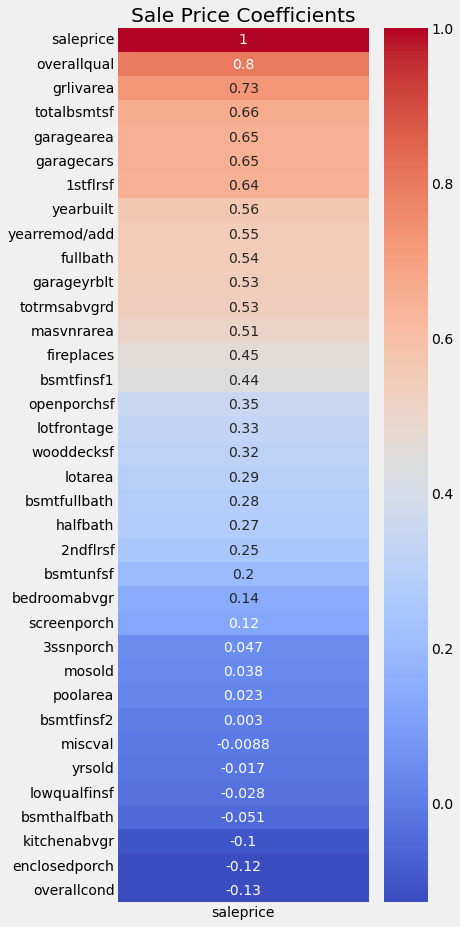

In [33]:
plt.figure(figsize=(5,15))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice', ascending=False), annot=True, cmap = "coolwarm");
plt.title('Sale Price Coefficients')

**Collinearity among numerical features**

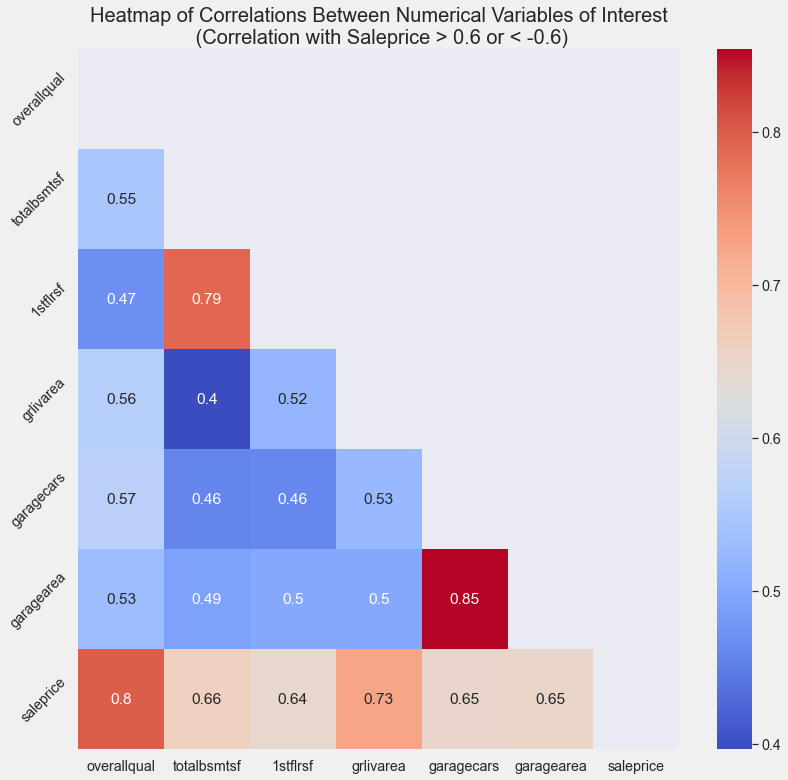

In [34]:
# View correlation only for those with coefficients > 0.6 and < -0.6

higher_corr = train.corr()['saleprice'][(train.corr()['saleprice'] >= 0.6) | (train.corr()['saleprice'] <= -0.6)]
higher_corr_columns = [x for x in higher_corr.index]
higher_corr.sort_values(ascending=False)
plt.figure(figsize=(12,12))
sns.set(font_scale=1.3)
plt.title('Heatmap of Correlations Between Numerical Variables of Interest\n (Correlation with Saleprice > 0.6 or < -0.6)', size=20)
mask = np.triu(train[higher_corr_columns].corr())
sns.heatmap(train[higher_corr_columns].corr(), annot=True, cmap='coolwarm', mask=mask)
tick = plt.yticks(rotation=45)

**Pairwise relationships between features with top 10 correlation coefficients**

From the above correlation heatmap, it is seen that these ten columns^ have high positive correlation to the sale price. 

^ refers to: 'overallqual','grlivarea','totalbsmtsf','garagearea','garagecars', '1stflrsf', 'yearbuilt', 'yearremod/add', 'fullbath', 'garageyrblt', 'totrmsabvgrd', 'masvnrarea', 'saleprice'

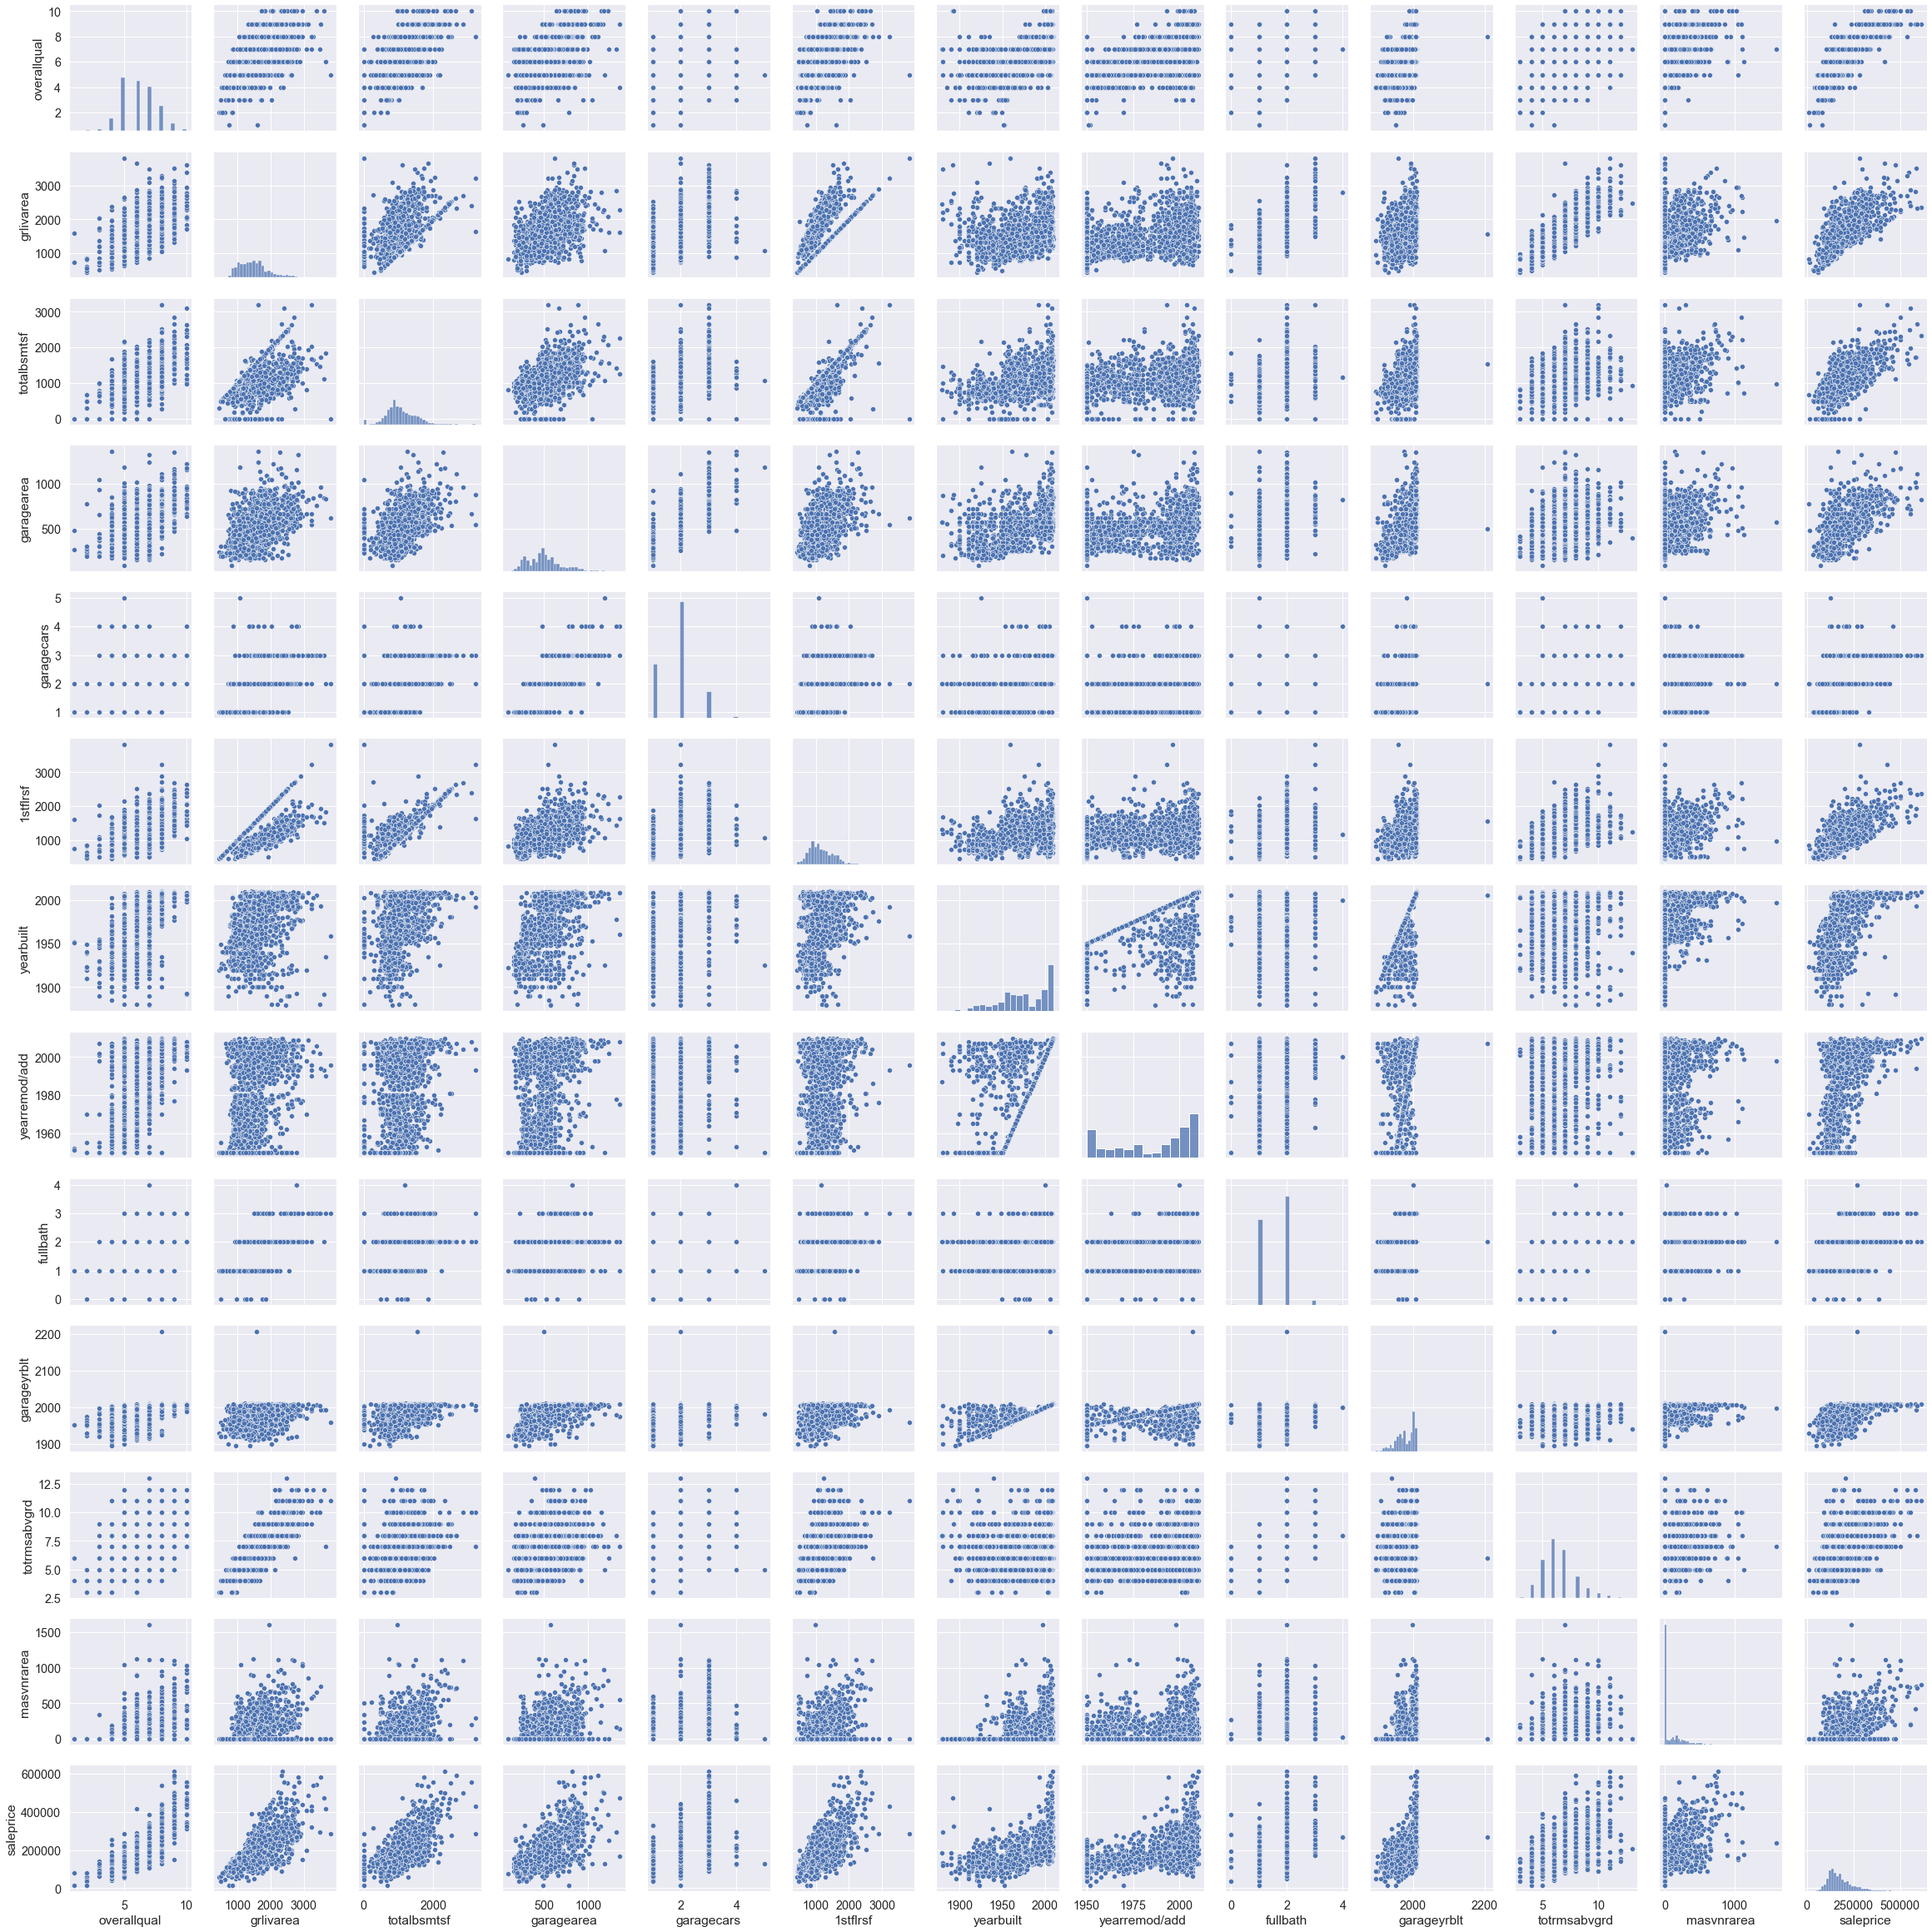

In [35]:
# Plot pairwise relationships in a dataset 
sns.pairplot(train[['overallqual','grlivarea','totalbsmtsf','garagearea','garagecars', '1stflrsf', 'yearbuilt', 'yearremod/add', 
                   'fullbath', 'garageyrblt', 'totrmsabvgrd', 'masvnrarea', 'saleprice']])
plt.tight_layout()

**Categorical features vs Sale Price**

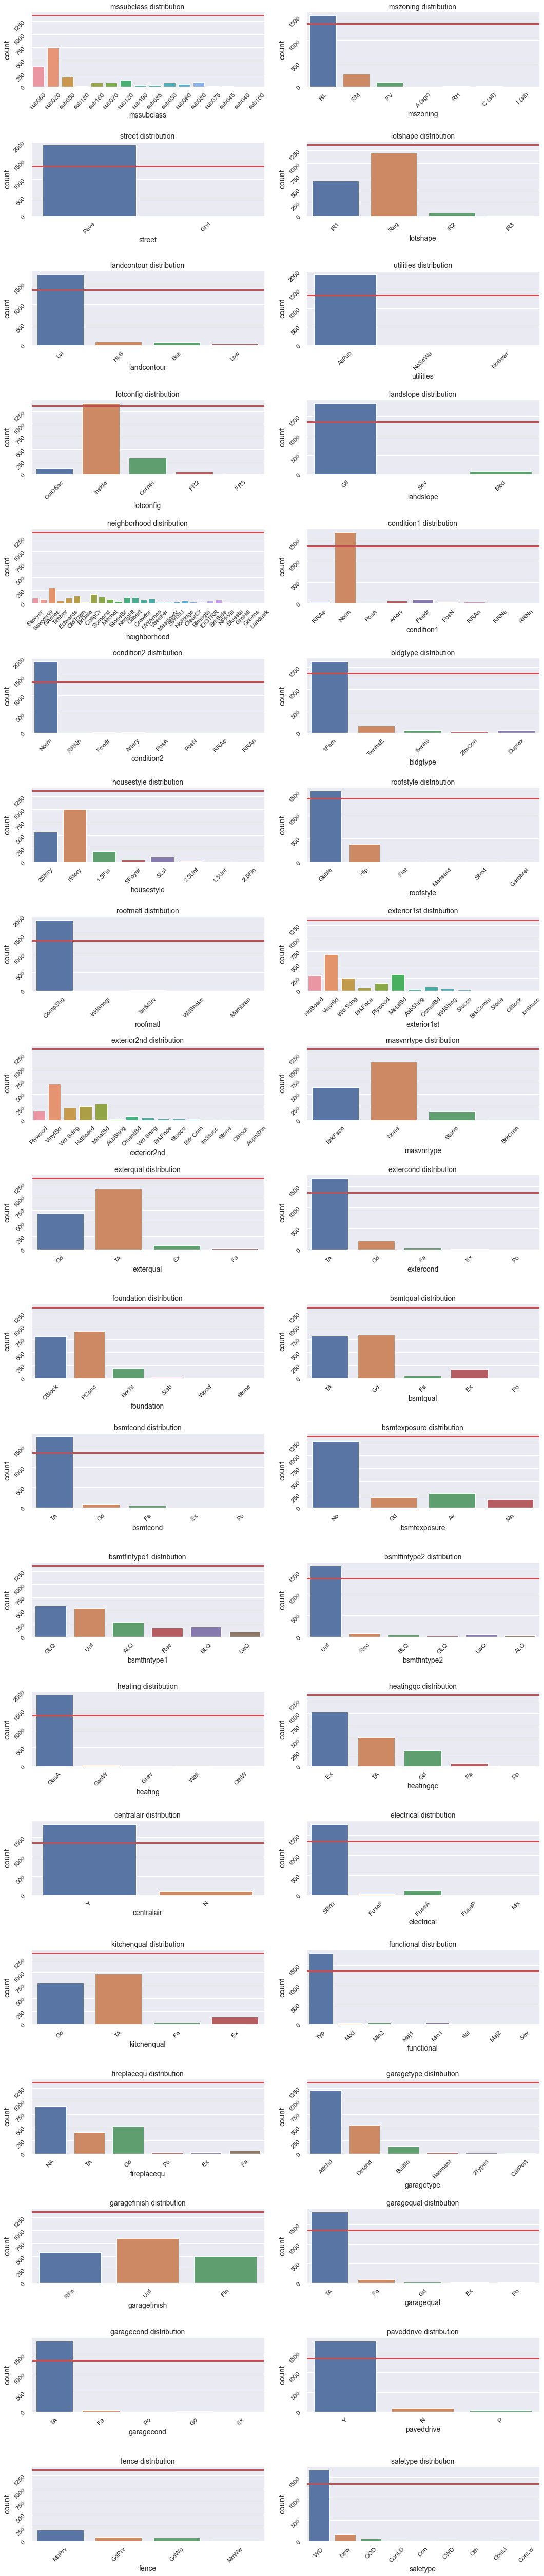

In [36]:
subplot_histograms(train, categ_data)
plt.tight_layout()

In [ ]:
subplot_box(train, categ_data)
plt.tight_layout()

**Neighbourhood vs Sale Price**

There seems to be a lot of variant in sale prices depending on neighbourhood. This stripplot takes a closer look at how property sale prices pan out within each neighbourhood in Ames. It can be seen that in some neighbourhoods- specifically Stonebrook, Northridge and South & West of Iowa State University, property sale prices have a wide spread and higher median value, whereas in other neighbourhoods, sale prices are not as widely spread, with a lower median value. Thus, the neighbourhood the property is located in is highly influential in determining a property's final price.

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Neighborhood vs Sale Price', fontsize=20)
plt.xticks(rotation=50)
sns.stripplot(data=train, x="neighborhood", y="saleprice", jitter=0.1, alpha=0.5)
plt.tight_layout()

# Feature Engineering

**Feature Engineering: variable ranking**

In [ ]:
# define function to convert ranking to numerical form
def cond_to_numeric(x):
    if 'Ex' in x:
        return 5
    elif 'Gd' in x:
        return 4
    elif 'TA' in x:
        return 3
    elif 'Fa' in x:
        return 2
    elif 'Po':
        return 1
    else:
        return 0

In [ ]:
# pass cond_to_numeric to convert data to numeric form
train['fireplacequ'] = train['fireplacequ'].map(cond_to_numeric)
train['extercond'] = train['extercond'].map(cond_to_numeric)
train['kitchenqual'] = train['kitchenqual'].map(cond_to_numeric)
train['heatingqc'] = train['heatingqc'].map(cond_to_numeric)
train['garagecond'] = train['garagecond'].map(cond_to_numeric)

In [ ]:
# calculate the mean QC score (Overall Quality/ Overall Condition) of properties in each neighborhood
qc_cols = ['overallqual', 'overallcond']

train.loc[:,'overall_qc'] = train.loc[:,qc_cols].mean(axis=1)

# rank the desirability of every neighbourhood by their median overall Quality/Condition
# step 1: perform groupby on neighborhood, then aggregate via taking median (as it's less affected by any outliers)
nb_qcscores = train.loc[:,['neighborhood','overall_qc']].groupby('neighborhood').agg('median')

# step 2: sort dataframe by descending order of the mean score
        #neighbourhood with higher overall QC --> assigned rank with greater number
nb_qcscores.sort_values(by='overall_qc', ascending=False, inplace=True)

# step 3: extract out neighborhood names from the index
nb_qcscores.loc[:,'neighborhood'] = nb_qcscores.index

# step 4: reset index to the usual numeric form
nb_qcscores.reset_index(drop=True, inplace=True)

#view neighbourhood ranked by score
nb_qcscores['neighborhood']

In [ ]:
# assign ordinal/numeric value to each neighborhood based on overall QC score
nrbrhd_rank = {'Veenker':1, 'Timber':2, 'StoneBr':3, 'Crawfor':4, 'NridgHt':5, 'NoRidge':6, 'Greens':7, 
               'Somerst':8, 'Blueste':9, 'SawyerW':10, 'NWAmes':11, 'NPkVill':12, 'Blmngtn':13,'GrnHill':14,
               'Gilbert':15, 'CollgCr':16, 'BrkSide':17, 'OldTown':18, 'ClearCr':19,'Landmrk':20, 'NAmes':21,
               'IDOTRR':22,'Edwards':23, 'SWISU':24,'Sawyer':25, 'BrDale':26, 'Mitchel':27, 'MeadowV':28}

train.replace({'neighborhood': nrbrhd_rank}, inplace=True)

In [ ]:
train['neighborhood'].head()

In [ ]:
# view unique values for housestyle
train['housestyle'].unique()

In [ ]:
# assign ordinal/numeric value to each housestyle based on number of storeys/floors
    # less_2flrs = 1 = '1Story', '1.5Fin', 'SFoyer', 'SLvl', '1.5Unf'
    # atleast_2flrs = 2 = '2Story', '2.5Unf', '2.5Fin'
train['num_flrs'] = train['housestyle'].map(lambda x: 1 if x in ['1Story','1.5Fin', 'SFoyer', 'SLvl', '1.5Unf'] else 2)

train[['num_flrs','housestyle']].head(10)

In [ ]:
# view unique values for garagefinish
train['garagefinish'].unique()

In [ ]:
# assign ordinal/numeric value to each garagefinish type
garagefin_rank = {'Fin': 1, 'RFn': 2, 'Unf': 3}

train.replace({'garagefinish': garagefin_rank}, inplace=True)

**Feature Engineering: dummify variables**

In [ ]:
# show unique values for utilities column
display(train['utilities'].unique())
display(train['utilities'].describe())

# most houses have full set of utilities ('allpub')
display(train['utilities'].value_counts()['AllPub'])
display(train['utilities'].value_counts()['NoSeWa'])

# as most houses have the full set, there is lack of variation for this feature
# we don't need to dummify 'utilities'

In [ ]:
# get dummies for lotshape, lotconfig
train = pd.get_dummies(train, columns = ['lotshape','lotconfig'], drop_first=True)

**Feature Engineering: create new variables from existing ones**

In [ ]:
# Create new variable: yrs_since_remod by subtracting yearremod/add from year 2022
train['yrs_since_remod'] = 2022 - train['yearremod/add']

In [ ]:
# Create new variable: bathroooms by taking sum of fullbath + halfbath
train['bathrooms'] = train['fullbath'] + (0.5*train['halfbath'])
train['bathrooms'] .describe()

### Feature Selection

Feature Selection is done by taking into account correlations of independent variables (features/ column names) with the dependent variable (sale price). I will consider only those variables with coefficients > 0.6 and < -0.6 that indicate strong positive correlation or strong negative correlation respectively.

Based on the correlation score viewable in the heatmap below, I am positively selecting: 'neighborhood', 'overallqual', 'grlivarea', and 'garagearea'. I am rejecting 'totalbsmtsf' and'1stflrsf' as firstly, I am not including basement as part of total square footage, and secondly, '1stflrsf' is in fact, a subset of above grade living area.

In addition, based on domain knowledge vis-à-vis Ames, Iowa gained by extensive external research, I am also positively selecting: 'garagefinish' as the average car ownership in Ames, Iowa is 2 cars per household which makes the finishing of the garage important, and 'num_flrs', as a sizeable portion of the population are family dwellings, hence household types are likely to influence preferred house types.

In [ ]:
# View correlation only for those with coefficients > 0.6 and < -0.6

higher_corr = train.corr()['saleprice'][(train.corr()['saleprice'] >= 0.6) | (train.corr()['saleprice'] <= -0.6)]
higher_corr_columns = [x for x in higher_corr.index]
higher_corr.sort_values(ascending=False)
plt.figure(figsize=(12,12))
sns.set(font_scale=1.3)
plt.title('Heatmap of Correlations Between Variables of Interest\n (Correlation with Saleprice > 0.6)', size=20)
mask = np.triu(train[higher_corr_columns].corr())
sns.heatmap(train[higher_corr_columns].corr(), annot=True, cmap='coolwarm', mask=mask)
tick = plt.yticks(rotation=45)

**Finalise select features**

In [ ]:
train = train[['neighborhood', 'overallqual', 'grlivarea', 'garagearea', 'garagefinish', 'num_flrs', 'saleprice']]

# Saving cleaned Train dataset

In [ ]:
# view columns in cleaned train set
train.columns


In [ ]:
# view cleaned train set
pd.options.display.max_columns = None
train.head()

In [ ]:
# final check for nulls in cleaned train data
train.isnull().sum()

In [ ]:
# save data as csv files
train.to_csv('./data/train_cleaned.csv', index=False)